<a href="https://www.kaggle.com/code/khoshbayani/iris-machine-learning?scriptVersionId=237951336" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Iris Dataset Classification Analysis**

This Jupyter notebook demonstrates a classification workflow using the classic **Iris Dataset**. We will:
1. **Load and inspect** the dataset
2. **Preprocess** (e.g., scaling) the features
3. **Train and evaluate** multiple classification models, specifically:
   - **K-Nearest Neighbors (KNN)**
   - **Support Vector Machine (SVM)**
   - **Decision Tree**
   - (and potentially others if needed)
4. **Tune** some hyperparameters to find better performing or more generalized models.

We will also highlight potential **overfitting** vs. **generalization** by comparing training and test scores, and show how to interpret or choose final models from the results.

In [1]:
# Importing necessary libraries
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.tree import DecisionTreeClassifier, plot_tree
import numpy as np  # if needed

# Load the Iris dataset
iris = load_iris()

### 1. **Initial Data Exploration**
We check shape, missing values, data types, and descriptive statistics for quick insights about the dataset.

In [2]:
# Checking the shape (rows x columns)
iris.data.shape

(150, 4)

In [3]:
# Checking the total number of missing values
pd.DataFrame(iris.data).isnull().sum().sum()

0

In [4]:
# Checking data types for each of the 4 feature columns
pd.DataFrame(iris.data).dtypes

0    float64
1    float64
2    float64
3    float64
dtype: object

In [5]:
# Basic descriptive statistics
pd.DataFrame(iris.data).describe()

,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### 2. **Feature Scaling**
We use `StandardScaler` to scale features to have mean = 0 and standard deviation = 1.  This can benefit certain models, especially distance-based or those sensitive to different feature scales.

In [6]:
X = StandardScaler().fit_transform(iris.data)
y = iris.target

In [7]:
# Checking that the scaled version has mean ~0 and std ~1
pd.DataFrame(X).describe()

,0,1,2,3
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-1.468455e-15,-1.823726e-15,-1.610564e-15,-9.473903e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.433947e+00,-1.567576e+00,-1.447076e+00
25%,-9.006812e-01,-5.923730e-01,-1.226552e+00,-1.183812e+00
50%,-5.250608e-02,-1.319795e-01,3.364776e-01,1.325097e-01
75%,6.745011e-01,5.586108e-01,7.627583e-01,7.906707e-01
max,2.492019e+00,3.090775e+00,1.785832e+00,1.712096e+00


### 3. **Train-Test Split**
We'll split our scaled data into training and testing subsets, typically using ~20-30% for test. Below we do 22% for demonstration.

In [8]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.22, random_state=72
)

### 4. **K-Nearest Neighbors**
- We do a basic KNN classification with `n_neighbors=5`.
- Then check train/test accuracy.
- Also, we'll do a small grid search to find better hyperparameters.

In [9]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)  # Fit the model on the training data
knn

KNeighborsClassifier()

In [10]:
# Evaluate the model on the train data
knn.score(X_train, y_train)

0.9658119658119658

In [11]:
# Evaluate the model on the test data
knn.score(X_test, y_test)

0.9696969696969697

#### **Grid Search for KNN**
We will search over different `n_neighbors` and `weights` to see if we can improve performance or reduce overfitting.

In [12]:
params = {
    'n_neighbors': range(1,22,2),
    'weights': ['uniform', 'distance']
}
cv = ShuffleSplit(n_splits=3, test_size=0.22, random_state=72)
grid_search = GridSearchCV(knn, param_grid=params, cv=cv, return_train_score=True, verbose=10)
grid_search.fit(X_train, y_train)  # Fit the model on the training data
grid_search

Fitting 3 folds for each of 22 candidates, totalling 66 fits
[CV 1/3; 1/22] START n_neighbors=1, weights=uniform.............................
[CV 1/3; 1/22] END n_neighbors=1, weights=uniform;, score=(train=1.000, test=0.962) total time=   0.0s
[CV 2/3; 1/22] START n_neighbors=1, weights=uniform.............................
[CV 2/3; 1/22] END n_neighbors=1, weights=uniform;, score=(train=1.000, test=0.923) total time=   0.0s
[CV 3/3; 1/22] START n_neighbors=1, weights=uniform.............................
[CV 3/3; 1/22] END n_neighbors=1, weights=uniform;, score=(train=1.000, test=0.846) total time=   0.0s
[CV 1/3; 2/22] START n_neighbors=1, weights=distance............................
[CV 1/3; 2/22] END n_neighbors=1, weights=distance;, score=(train=1.000, test=0.962) total time=   0.0s
[CV 2/3; 2/22] START n_neighbors=1, weights=distance............................
[CV 2/3; 2/22] END n_neighbors=1, weights=distance;, score=(train=1.000, test=0.923) total time=   0.0s
[CV 3/3; 2/22] ST

GridSearchCV(cv=ShuffleSplit(n_splits=3, random_state=72, test_size=0.22, train_size=None),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 22, 2),
                         'weights': ['uniform', 'distance']},
             return_train_score=True, verbose=10)

In [13]:
print("best_params", grid_search.best_params_)
print("best_Score (train score)", grid_search.cv_results_["mean_train_score"][grid_search.best_index_])
print("best_Score (test score)", grid_search.cv_results_["mean_test_score"][grid_search.best_index_])

best_params {'n_neighbors': 17, 'weights': 'uniform'}
best_Score (train score) 0.9450549450549449
best_Score (test score) 0.9615384615384616


> The best hyperparameters show slightly improved average performance. We can also check if there's less difference between training & test to reduce overfitting.

We'll see how different parameter combos do by analyzing the difference in train/test performance.

In [14]:
mean_train_score = grid_search.cv_results_["mean_train_score"]
mean_test_score  = grid_search.cv_results_["mean_test_score"]

In [15]:
# index of the param setting that yields the minimum difference between train & test
index_min_diff = (abs(mean_train_score - mean_test_score)).argmin()

In [16]:
grid_search.cv_results_["params"][index_min_diff]

{'n_neighbors': 15, 'weights': 'uniform'}

So, `{'n_neighbors': 15, 'weights': 'uniform'}` yields the **smallest** train-test difference, which might be a good compromise to avoid overfitting, even if the absolute test score might be slightly lower. This is a matter of preference.

### 5. **Support Vector Machine (SVM)**
- We'll try a basic SVM with `'linear'` kernel.
- Evaluate train/test.
- Then do a grid search with different kernels and C/gamma combos.

In [17]:
# Re-split data to a different ratio just to see different test sizes.
# (But typically you'd keep the same, unless you wanted more test coverage etc.)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.44, random_state=72
)

In [18]:
svm = SVC(kernel='linear', C=1.0, random_state=72)
svm.fit(X_train, y_train)
svm

SVC(kernel='linear', random_state=72)

In [19]:
svm.score(X_train, y_train)

0.9642857142857143

In [20]:
svm.score(X_test, y_test)

0.9545454545454546

#### **SVM Grid Search**
We'll vary kernel, C, and gamma.

In [21]:
params = {
    'kernel': ['linear','poly','rbf','sigmoid'],
    'C': [0.1,1,10,100],
    'gamma': ['scale','auto']
}
cv = ShuffleSplit(n_splits=3, test_size=0.22, random_state=72)
svm_grid_search = GridSearchCV(svm, param_grid=params, cv=cv, return_train_score=True, verbose=10)
svm_grid_search.fit(X_train, y_train)
svm_grid_search

Fitting 3 folds for each of 32 candidates, totalling 96 fits
[CV 1/3; 1/32] START C=0.1, gamma=scale, kernel=linear..........................
[CV 1/3; 1/32] END C=0.1, gamma=scale, kernel=linear;, score=(train=0.969, test=0.947) total time=   0.0s
[CV 2/3; 1/32] START C=0.1, gamma=scale, kernel=linear..........................
[CV 2/3; 1/32] END C=0.1, gamma=scale, kernel=linear;, score=(train=0.969, test=0.947) total time=   0.0s
[CV 3/3; 1/32] START C=0.1, gamma=scale, kernel=linear..........................
[CV 3/3; 1/32] END C=0.1, gamma=scale, kernel=linear;, score=(train=0.954, test=0.947) total time=   0.0s
[CV 1/3; 2/32] START C=0.1, gamma=scale, kernel=poly............................
[CV 1/3; 2/32] END C=0.1, gamma=scale, kernel=poly;, score=(train=0.800, test=0.737) total time=   0.0s
[CV 2/3; 2/32] START C=0.1, gamma=scale, kernel=poly............................
[CV 2/3; 2/32] END C=0.1, gamma=scale, kernel=poly;, score=(train=0.754, test=0.895) total time=   0.0s
[CV 3/3;

GridSearchCV(cv=ShuffleSplit(n_splits=3, random_state=72, test_size=0.22, train_size=None),
             estimator=SVC(kernel='linear', random_state=72),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             return_train_score=True, verbose=10)

In [22]:
# Best found parameters
svm_grid_search.best_params_

{'C': 1, 'gamma': 'scale', 'kernel': 'linear'}

In [23]:
svm_grid_search.best_score_

0.9649122807017543

We see that `'C':1, 'gamma':'scale', 'kernel':'linear'` is the best combination for average performance.  Let's also check how close or far the train/test are.

In [24]:
svm_train_scores = svm_grid_search.cv_results_["mean_train_score"]
svm_test_scores  = svm_grid_search.cv_results_["mean_test_score"]


In [25]:
diff_scores = abs(svm_train_scores - svm_test_scores)
index_mean_diff_svm_scores = diff_scores.argmin()

In [26]:
# This parameter set yields the smallest train-test difference
svm_grid_search.cv_results_["params"][index_mean_diff_svm_scores]

{'C': 10, 'gamma': 'scale', 'kernel': 'sigmoid'}

So from a generalization standpoint, `{'C': 10, 'gamma': 'scale', 'kernel': 'sigmoid'}` has nearly equal train/test average, but also check if the absolute scores are good enough vs. the best absolute test score.

In [27]:
svm_scores_df = pd.DataFrame({
    "train_scores": svm_train_scores,
    "test_scores":  svm_test_scores,
    "diff_scores":  diff_scores,
    "params":       svm_grid_search.cv_results_["params"]
}).sort_values(by="diff_scores", ascending=True).reset_index(drop=True)
svm_scores_df

,train_scores,test_scores,diff_scores,params
0,0.876923,0.877193,0.000270,"{'C': 10, 'gamma': 'scale', 'kernel': 'sigmoid'}"
1,0.969231,0.964912,0.004318,"{'C': 10, 'gamma': 'scale', 'kernel': 'poly'}"
2,0.969231,0.964912,0.004318,"{'C': 1, 'gamma': 'auto', 'kernel': 'linear'}"
3,0.969231,0.964912,0.004318,"{'C': 1, 'gamma': 'scale', 'kernel': 'linear'}"
4,0.974359,0.964912,0.009447,"{'C': 10, 'gamma': 'auto', 'kernel': 'poly'}"
5,0.979487,0.964912,0.014575,"{'C': 10, 'gamma': 'auto', 'kernel': 'linear'}"
6,0.979487,0.964912,0.014575,"{'C': 10, 'gamma': 'scale', 'kernel': 'linear'}"
7,0.892308,0.877193,0.015115,"{'C': 100, 'gamma': 'auto', 'kernel': 'sigmoid'}"
8,0.964103,0.947368,0.016734,"{'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}"
9,0.964103,0.947368,0.016734,"{'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}"


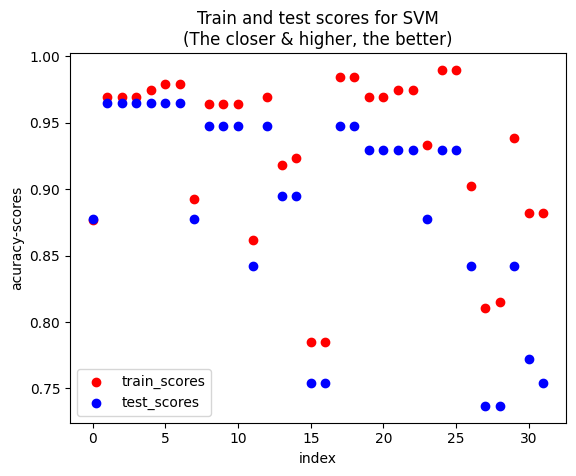

In [28]:
# A quick scatter plot to visualize train vs test across param sets
plt.scatter(range(len(svm_scores_df["train_scores"])), svm_scores_df["train_scores"], color="red", label="train_scores")
plt.scatter(range(len(svm_scores_df["test_scores"])), svm_scores_df["test_scores"], color="blue", label="test_scores")
plt.ylabel("acuracy-scores")
plt.xlabel("index")
plt.title("Train and test scores for SVM\n(The closer & higher, the better)")
plt.legend()
plt.show()

# 6. **Decision Tree**
Let's do a simple Decision Tree with limited max_leaf_nodes to reduce overfitting.

In [29]:
decison_tree = DecisionTreeClassifier(max_leaf_nodes=4, random_state=72)
decison_tree.fit(X_train, y_train)
decison_tree

DecisionTreeClassifier(max_leaf_nodes=4, random_state=72)

In [30]:
decison_tree.score(X_train, y_train)

0.9761904761904762

In [31]:
decison_tree.score(X_test, y_test)

0.9696969696969697

We get quite good performance with a small tree. Typically, you can also do grid search over `max_depth` or `max_leaf_nodes` or `min_samples_split` to refine further.

## **Conclusion**
- We tried multiple classifiers on the Iris dataset.
- KNN, SVM, and a small Decision Tree all yield high accuracy (90+%).
- Using cross-validation and grid search can help find good hyperparameters that either maximize test accuracy or minimize overfitting.

In practice, you can finalize the best model or ensemble them, and do final performance evaluation with confusion matrix, classification report, etc.

ChatGPT was used for cleaning up, organizing, and refactoring the code